In [1]:
try:
    from utils import *
except:
    !wget https://raw.githubusercontent.com/dglee6257/Dataprocessing/main/utils.py -O ./utils.py
    from utils import *    

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = read_csv("Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


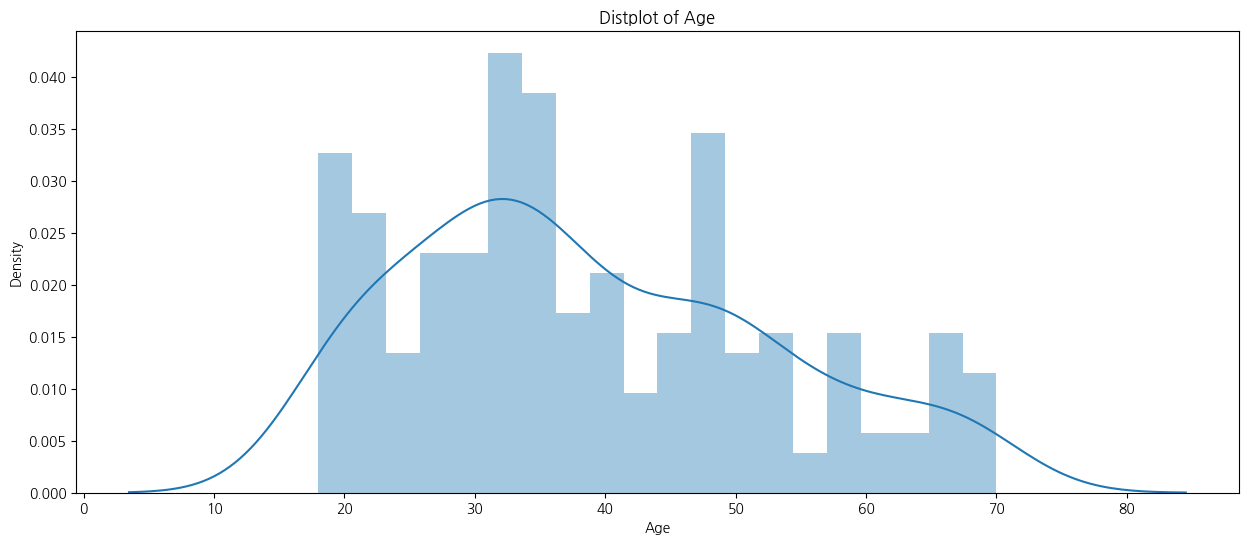

In [5]:
plt.figure(1, figsize=(15, 6))
sns.distplot(df["Age"], bins=20)
plt.title("Distplot of Age");

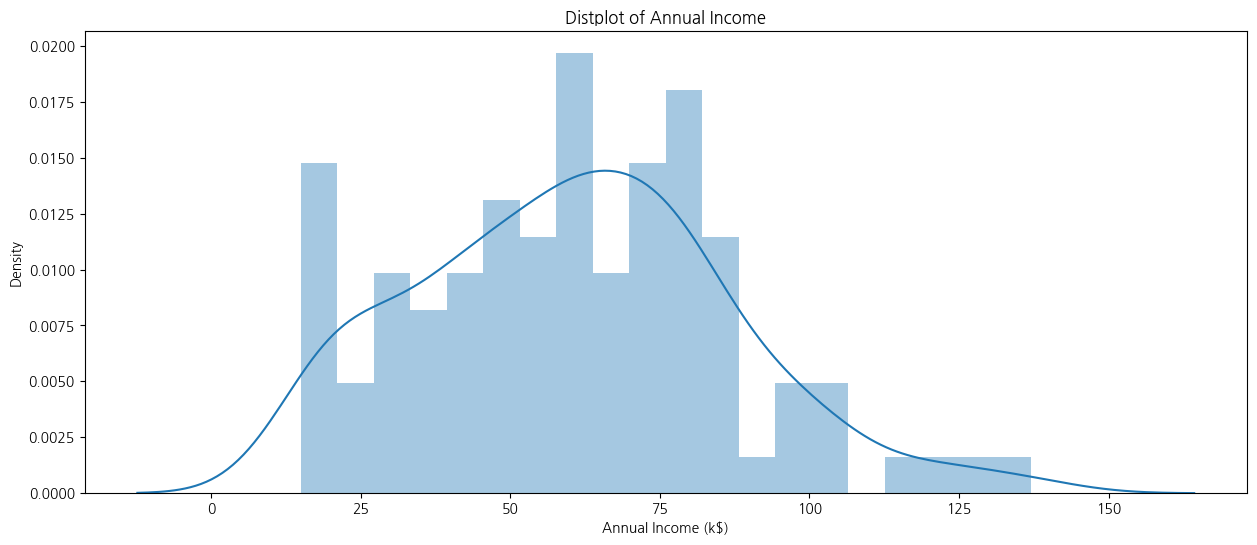

In [6]:
plt.figure(1, figsize=(15, 6))
sns.distplot(df["Annual Income (k$)"], bins=20)
plt.title("Distplot of Annual Income");

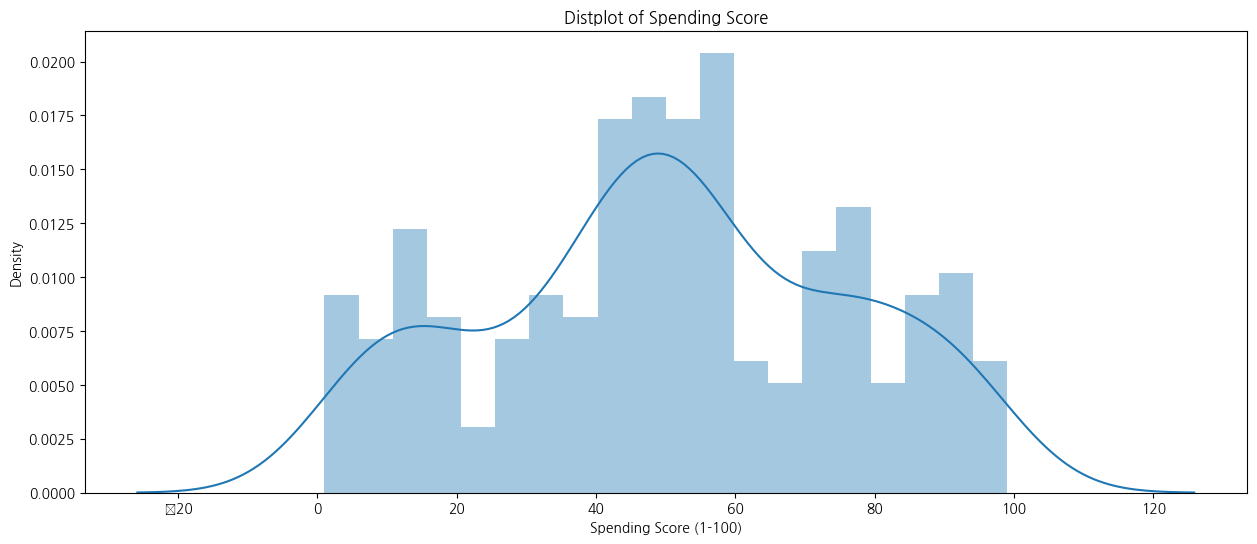

In [7]:
plt.figure(1, figsize=(15, 6))
sns.distplot(df["Spending Score (1-100)"], bins=20)
plt.title("Distplot of Spending Score");

Gender
Female    112
Male       88
Name: count, dtype: int64


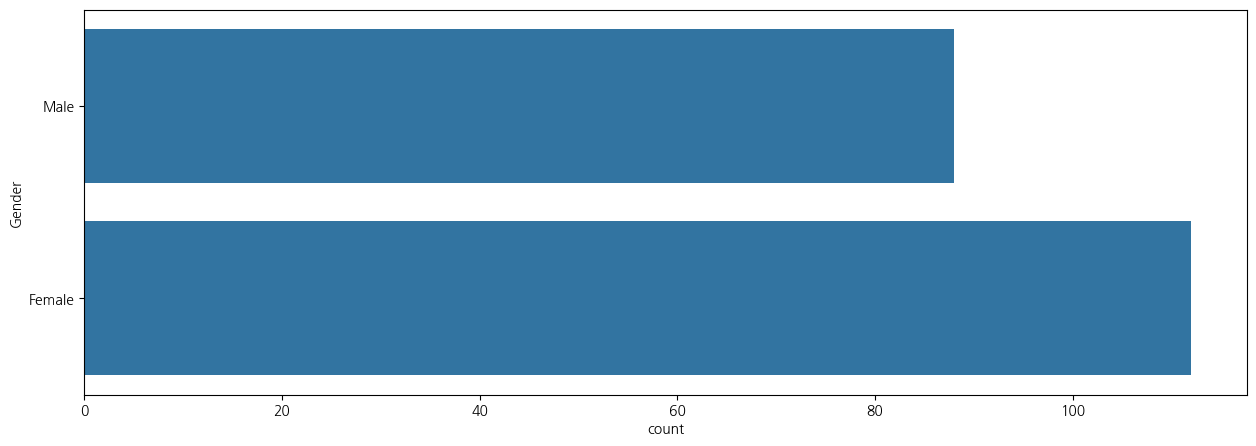

In [8]:
plt.figure(1, figsize=(15, 5))
sns.countplot(y="Gender", data=df)
print(df["Gender"].value_counts());

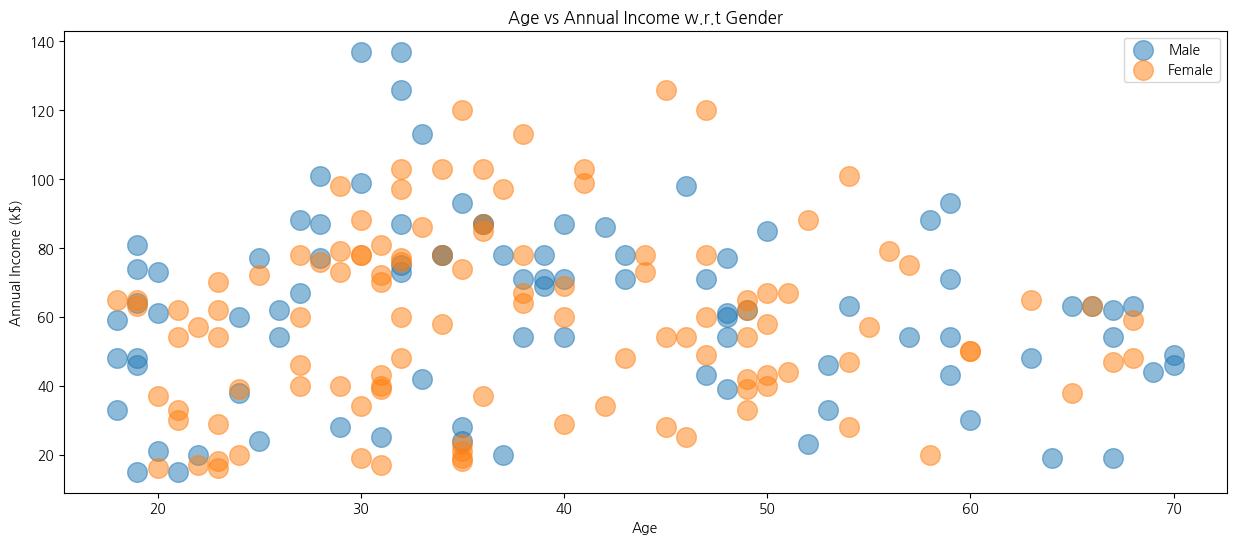

In [9]:
plt.figure(1, figsize=(15, 6))
for gender in ["Male", "Female"]:
    plt.scatter(
        x="Age",
        y="Annual Income (k$)",
        data=df[df["Gender"] == gender],
        s=200,
        alpha=0.5,
        label=gender,
    )
plt.xlabel("Age"), plt.ylabel("Annual Income (k$)")
plt.title("Age vs Annual Income w.r.t Gender")
plt.legend();

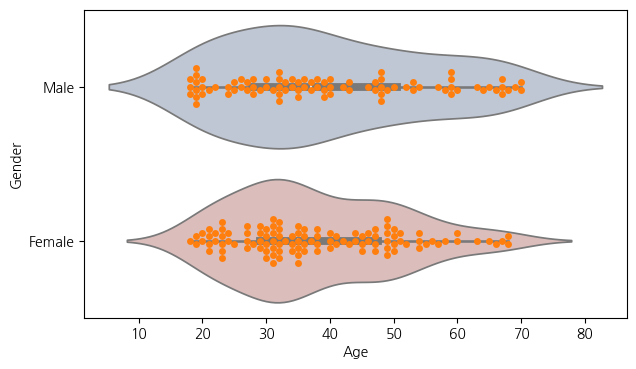

In [10]:
plt.figure(1, figsize=(7, 4))

sns.violinplot(x="Age", y="Gender", data=df, palette="vlag")
sns.swarmplot(x="Age", y="Gender", data=df)
plt.ylabel("Gender");

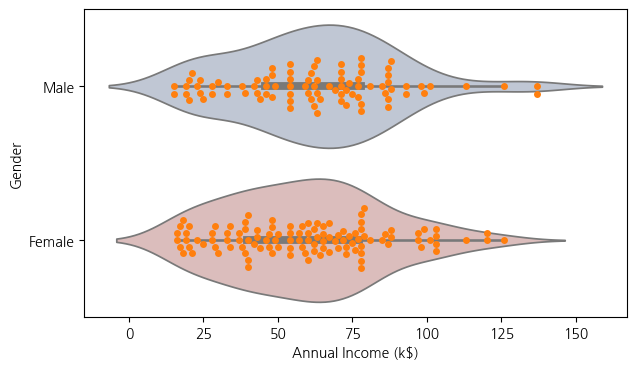

In [11]:
plt.figure(1, figsize=(7, 4))

sns.violinplot(x="Annual Income (k$)", y="Gender", data=df, palette="vlag")
sns.swarmplot(x="Annual Income (k$)", y="Gender", data=df)
plt.ylabel("Gender");

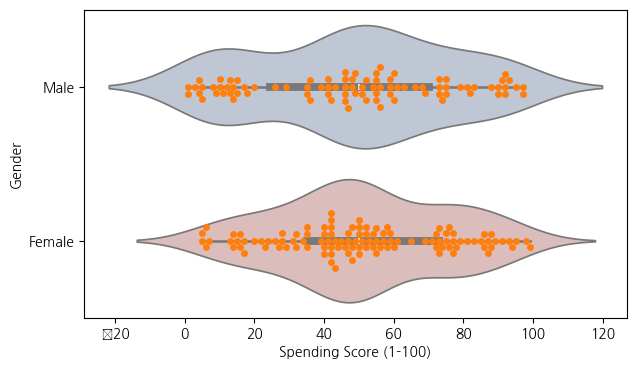

In [12]:
plt.figure(1, figsize=(7, 4))

sns.violinplot(x="Spending Score (1-100)", y="Gender", data=df, palette="vlag")
sns.swarmplot(x="Spending Score (1-100)", y="Gender", data=df)
plt.ylabel("Gender");

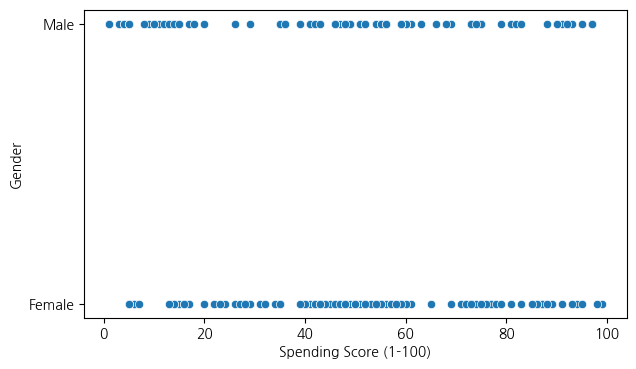

In [13]:
plt.figure(1, figsize=(7, 4))
sns.scatterplot(x="Spending Score (1-100)", y="Gender", data=df);

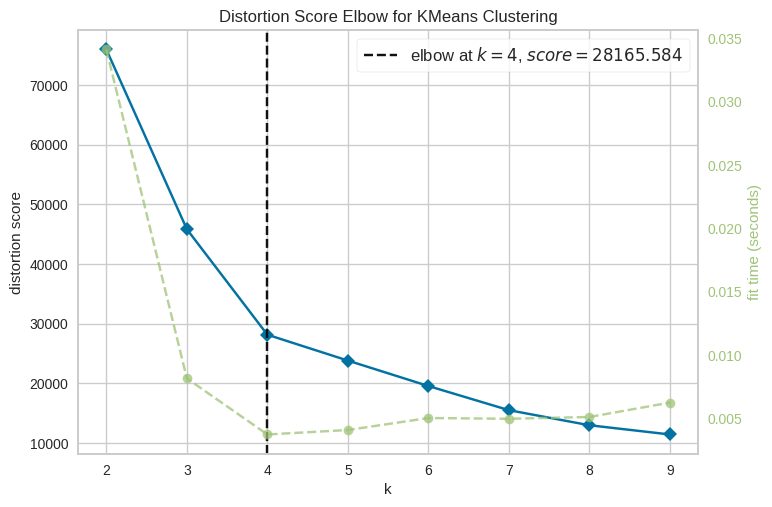

In [14]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

data = df[["Age", "Spending Score (1-100)"]].iloc[:, :].values

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 10))
visualizer.fit(data)
visualizer.show();

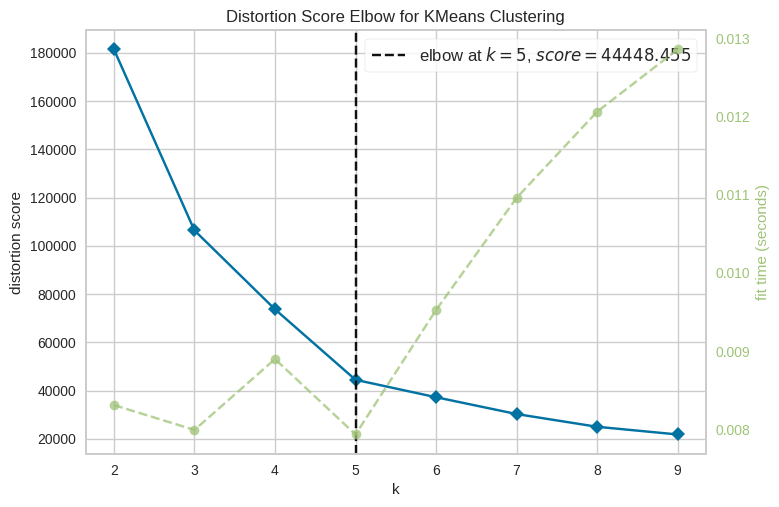

In [15]:
data = df[["Annual Income (k$)", "Spending Score (1-100)"]].iloc[:, :].values
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 10))
visualizer.fit(data)
visualizer.show();

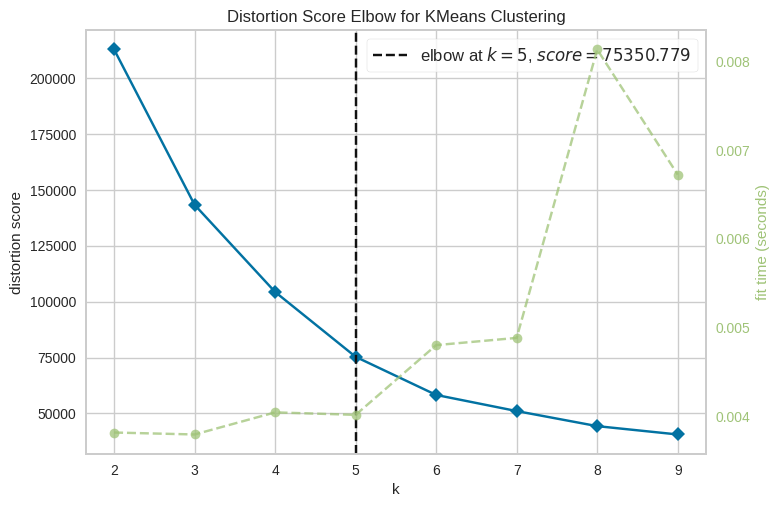

In [16]:
data = df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].iloc[:, :].values
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 10))
visualizer.fit(data)
visualizer.show();

In [17]:
data = df[["Age", "Spending Score (1-100)"]].iloc[:, :].values
algorithm = KMeans(n_clusters=4)
algorithm.fit(data)
labels1 = algorithm.labels_
df["label1"] = labels1
df.head(20)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label1
0,1,Male,19,15,39,0
1,2,Male,21,15,81,2
2,3,Female,20,16,6,1
3,4,Female,23,16,77,2
4,5,Female,31,17,40,0
5,6,Female,22,17,76,2
6,7,Female,35,18,6,1
7,8,Female,23,18,94,2
8,9,Male,64,19,3,1
9,10,Female,30,19,72,2


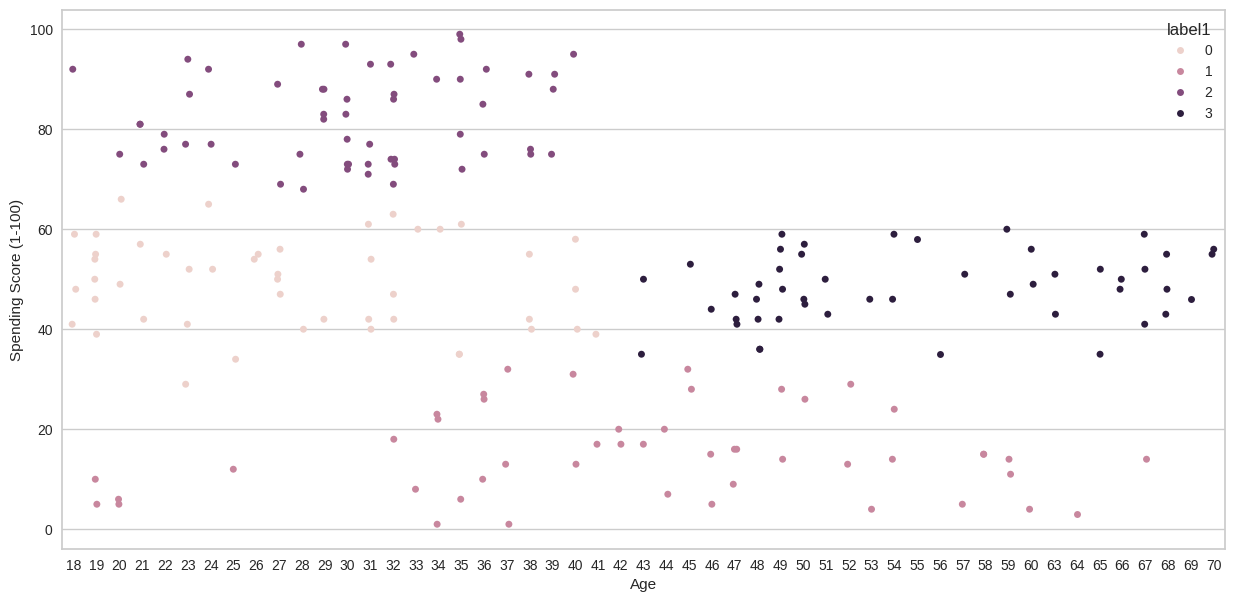

In [18]:
plt.figure(figsize=(15, 7))
sns.stripplot(x="Age", y="Spending Score (1-100)", data=df, hue="label1", jitter=True);

In [19]:
data = df[["Annual Income (k$)", "Spending Score (1-100)"]].iloc[:, :].values
algorithm = KMeans(n_clusters=5)
algorithm.fit(data)
labels2 = algorithm.labels_
df["label2"] = labels2
df.head(20)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label1,label2
0,1,Male,19,15,39,0,4
1,2,Male,21,15,81,2,2
2,3,Female,20,16,6,1,4
3,4,Female,23,16,77,2,2
4,5,Female,31,17,40,0,4
5,6,Female,22,17,76,2,2
6,7,Female,35,18,6,1,4
7,8,Female,23,18,94,2,2
8,9,Male,64,19,3,1,4
9,10,Female,30,19,72,2,2


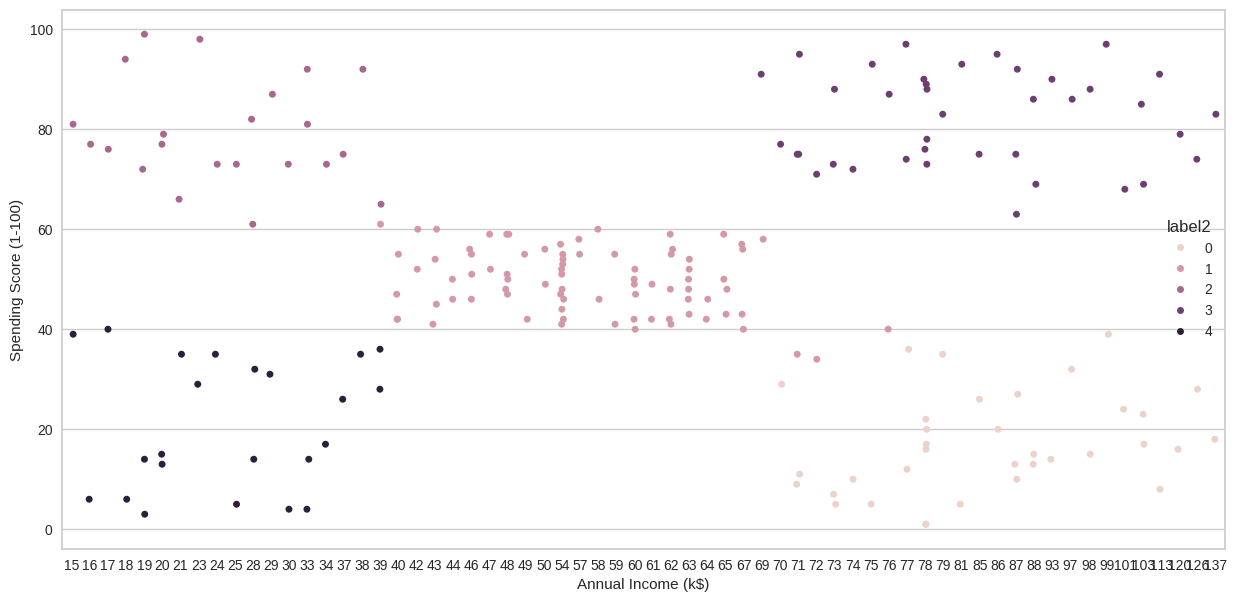

In [20]:
plt.figure(figsize=(15, 7))
sns.stripplot(
    x="Annual Income (k$)",
    y="Spending Score (1-100)",
    data=df,
    hue="label2",
    jitter=True,
);

In [21]:
data = df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].iloc[:, :].values
algorithm = KMeans(n_clusters=5)
algorithm.fit(data)
labels3 = algorithm.labels_
df["label3"] = labels3
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label1,label2,label3
0,1,Male,19,15,39,0,4,0
1,2,Male,21,15,81,2,2,3
2,3,Female,20,16,6,1,4,0
3,4,Female,23,16,77,2,2,3
4,5,Female,31,17,40,0,4,0
5,6,Female,22,17,76,2,2,3
6,7,Female,35,18,6,1,4,0
7,8,Female,23,18,94,2,2,3
8,9,Male,64,19,3,1,4,0
9,10,Female,30,19,72,2,2,3


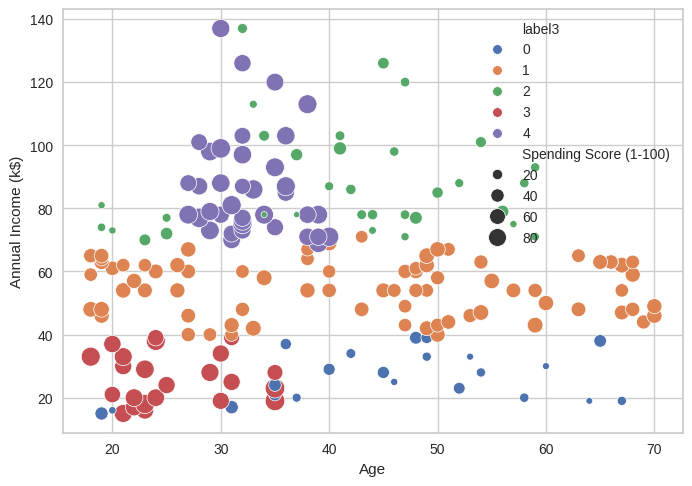

In [22]:
sns.scatterplot(
    x="Age",
    y="Annual Income (k$)",
    hue="label3",
    size="Spending Score (1-100)",
    data=df,
    palette="deep",
    sizes=(20, 200),
);

In [23]:
algorithm.predict([[19, 15, 39]])
data = df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].iloc[:, :].values

df["label3_pred"] = algorithm.predict(data)
df[["label3", "label3_pred"]]

,label3,label3_pred
0,0,0
1,3,3
2,0,0
3,3,3
4,0,0
...,...,...
195,4,4
196,2,2
197,4,4
198,2,2


In [24]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

In [25]:
data = df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].iloc[:, :].values
data.shape

(200, 3)

(199, 4)


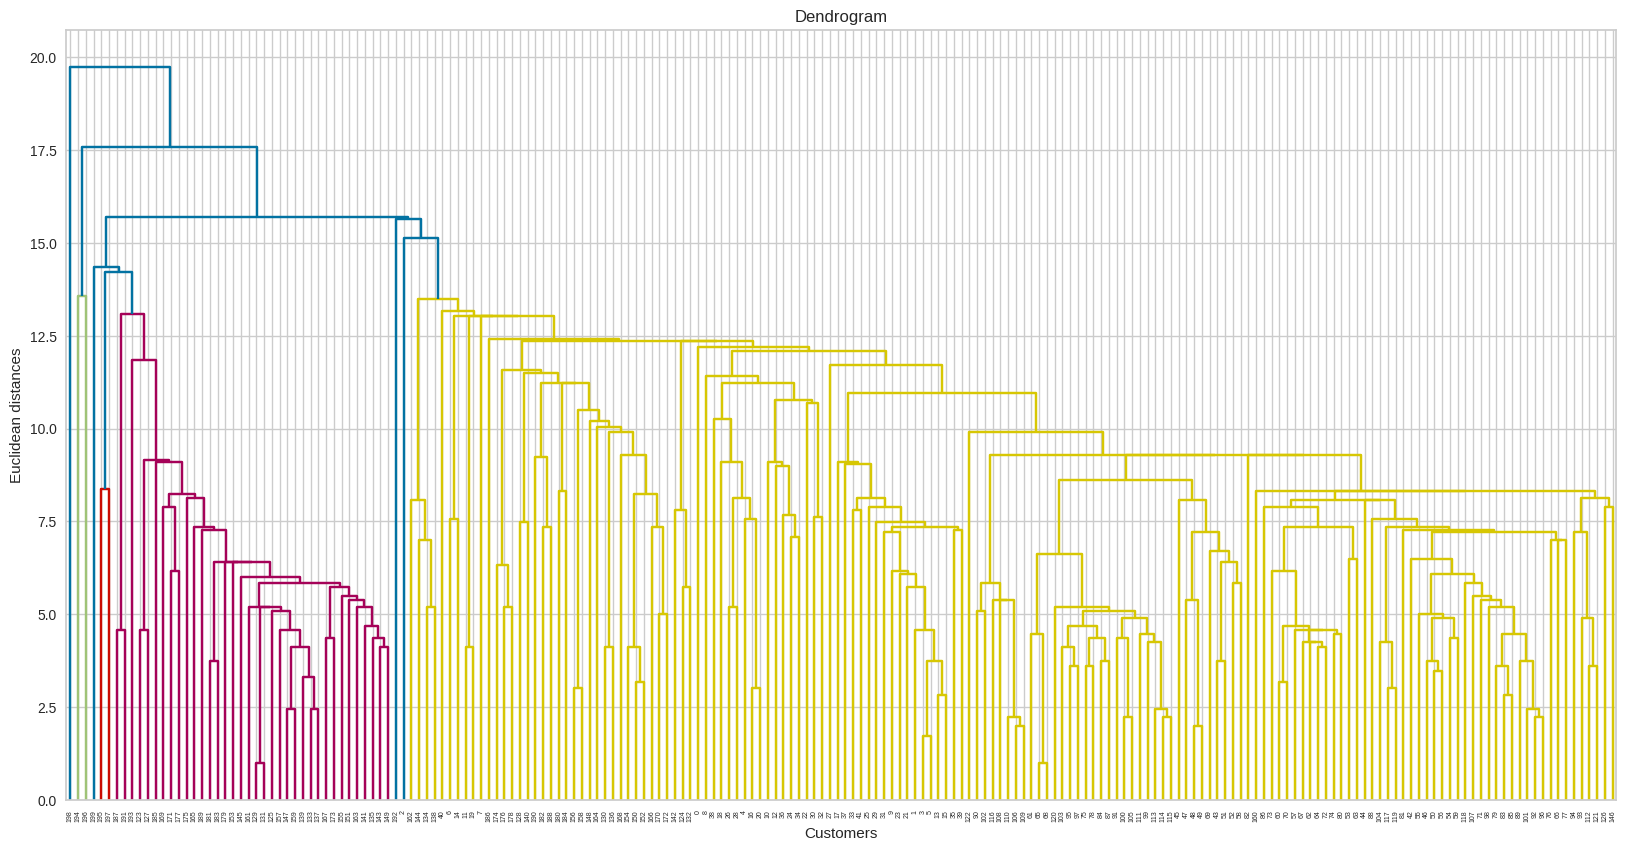

In [26]:
plt.figure(figsize=(20, 10))
cluster = linkage(data, method='single')
print(cluster.shape)
dendrogram = dendrogram(cluster)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances');

In [27]:
from scipy.cluster.hierarchy import dendrogram, linkage

(199, 4)


Text(0, 0.5, 'Euclidean distances')

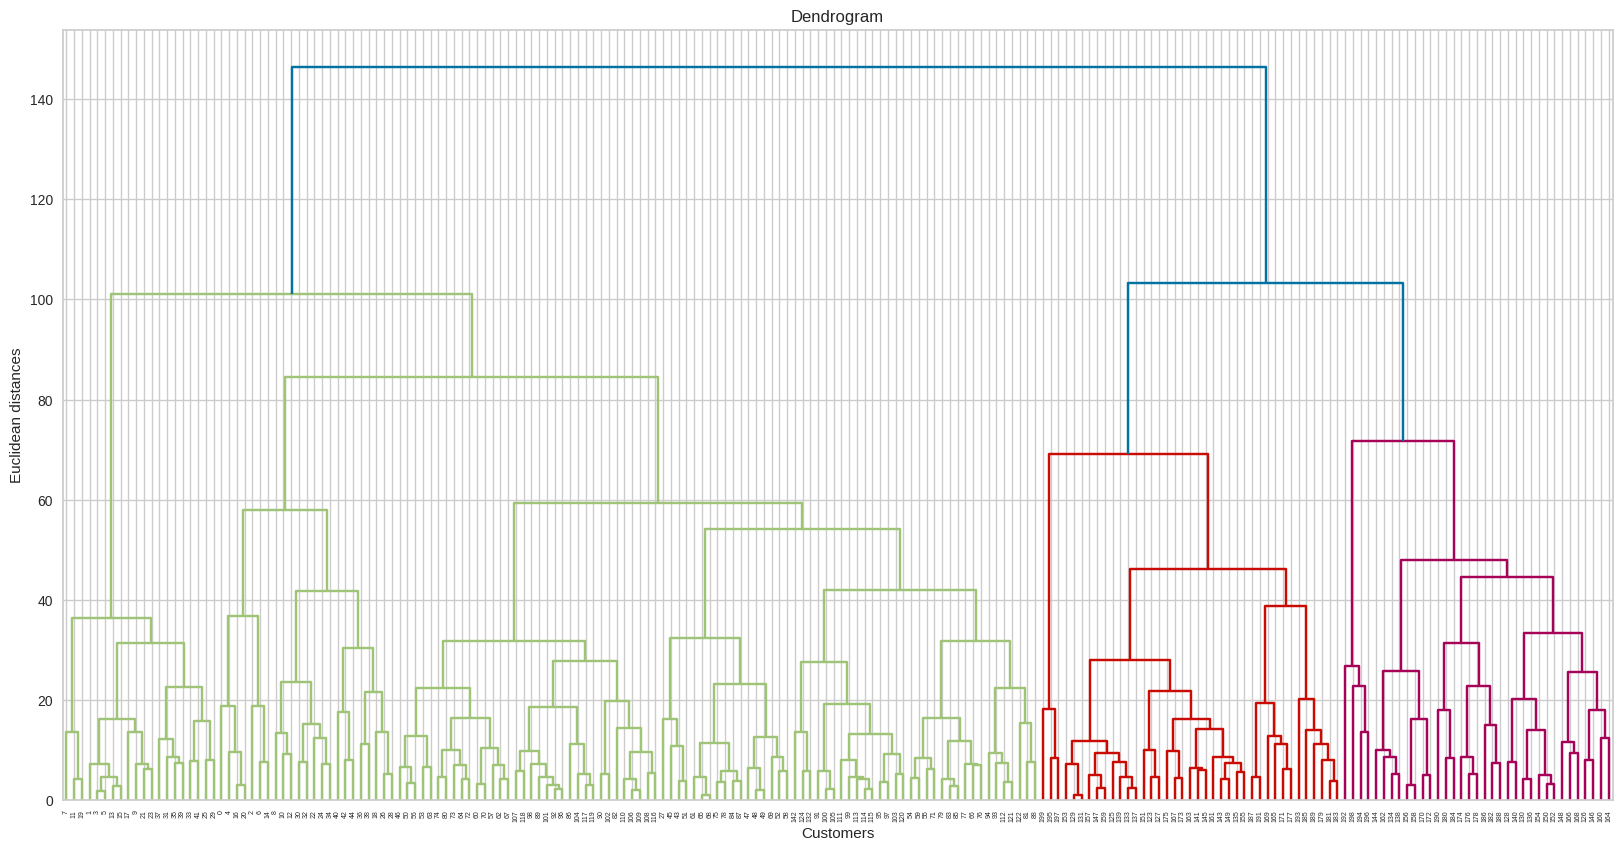

In [28]:
plt.figure(figsize=(20, 10))
cluster = linkage(data, method="complete")
print(cluster.shape)
dendrogram = dendrogram(cluster)
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean distances")

(199, 4)


Text(0, 0.5, 'Euclidean distance')

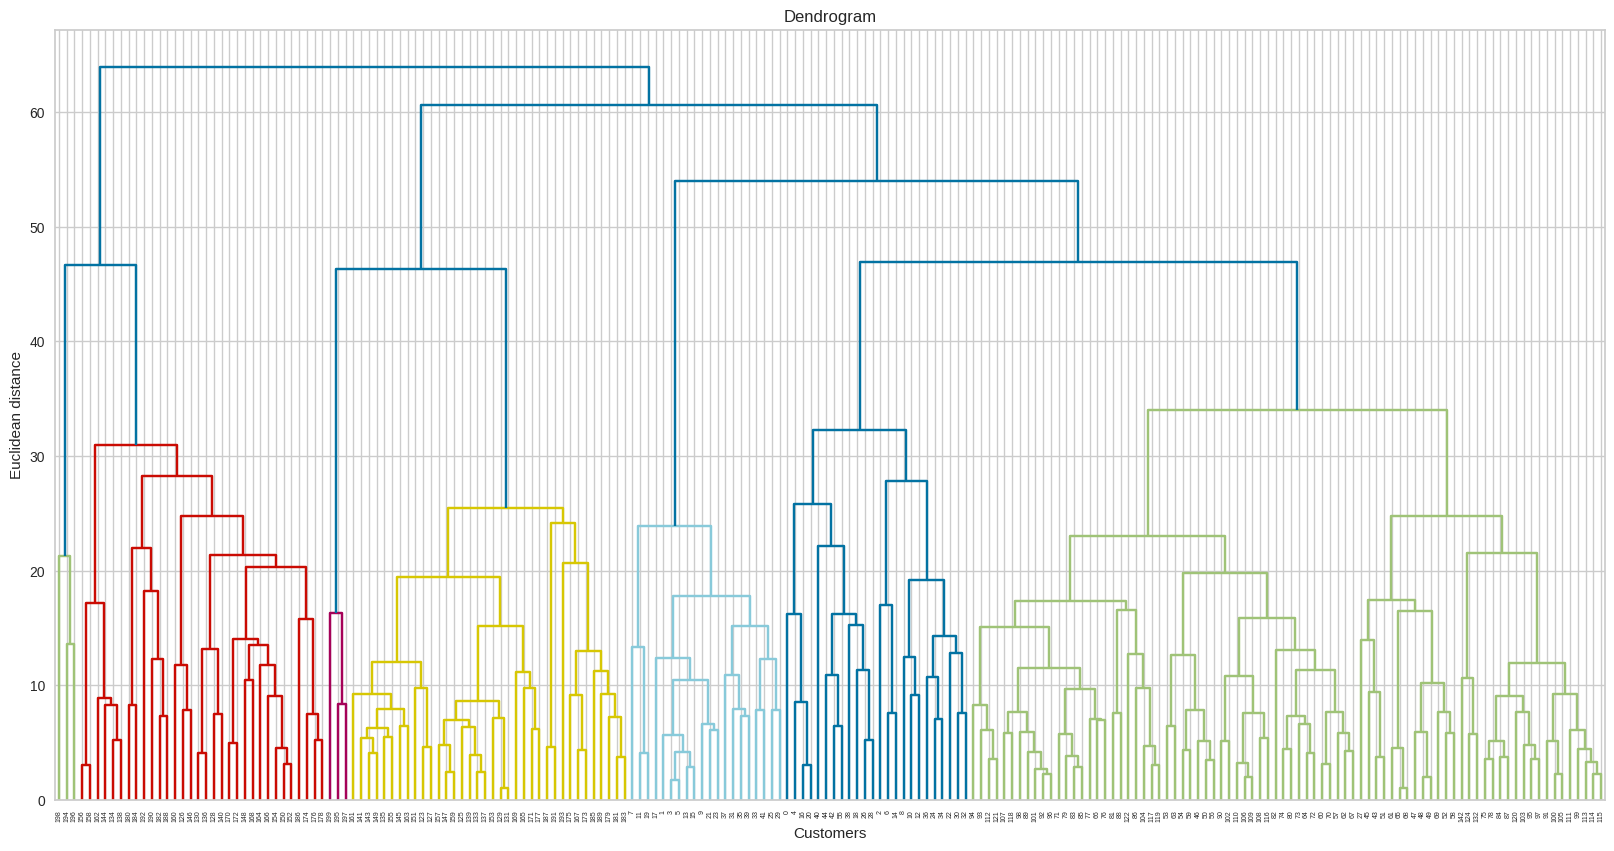

In [29]:
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(20, 10))
cluster = linkage(data, method="average")
print(cluster.shape)
dendrogram = dendrogram(cluster)
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean distance")

(199, 4)


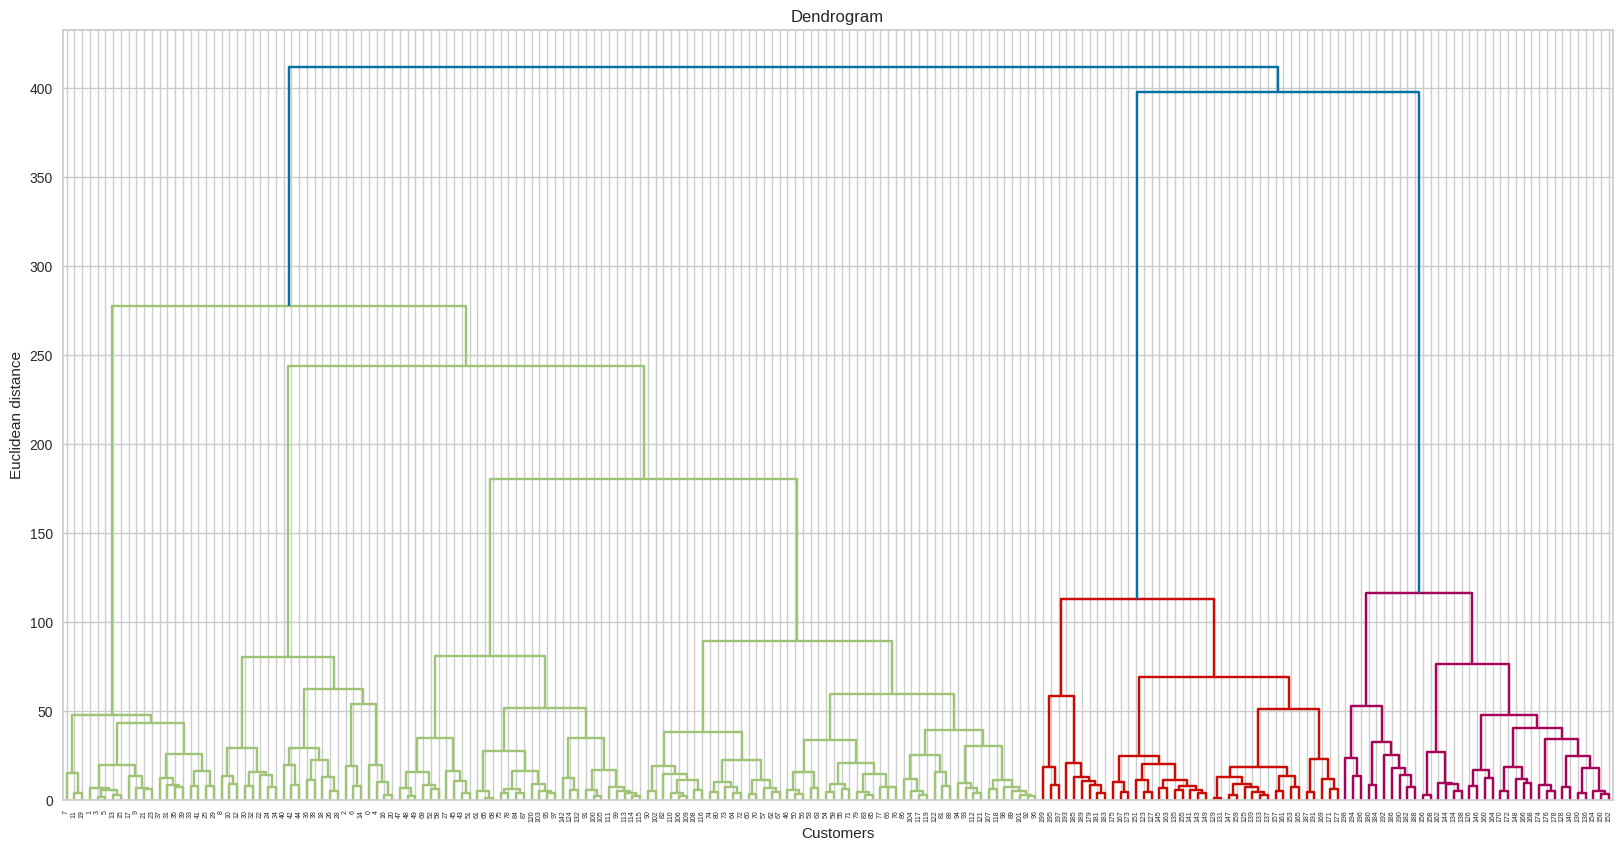

In [30]:
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(20, 10))
cluster = linkage(data, method="ward")
print(cluster.shape)
dendrogram = dendrogram(cluster)
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean distance");

In [31]:
from sklearn.cluster import AgglomerativeClustering

cluster_model = AgglomerativeClustering(
    n_clusters=5,
    affinity="euclidean",
    linkage="ward",
)
cluster_label = cluster_model.fit_predict(data)
df["label14"] = cluster_label
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label1,label2,label3,label3_pred,label14
0,1,Male,19,15,39,0,4,0,0,4
1,2,Male,21,15,81,2,2,3,3,3
2,3,Female,20,16,6,1,4,0,0,4
3,4,Female,23,16,77,2,2,3,3,3
4,5,Female,31,17,40,0,4,0,0,4


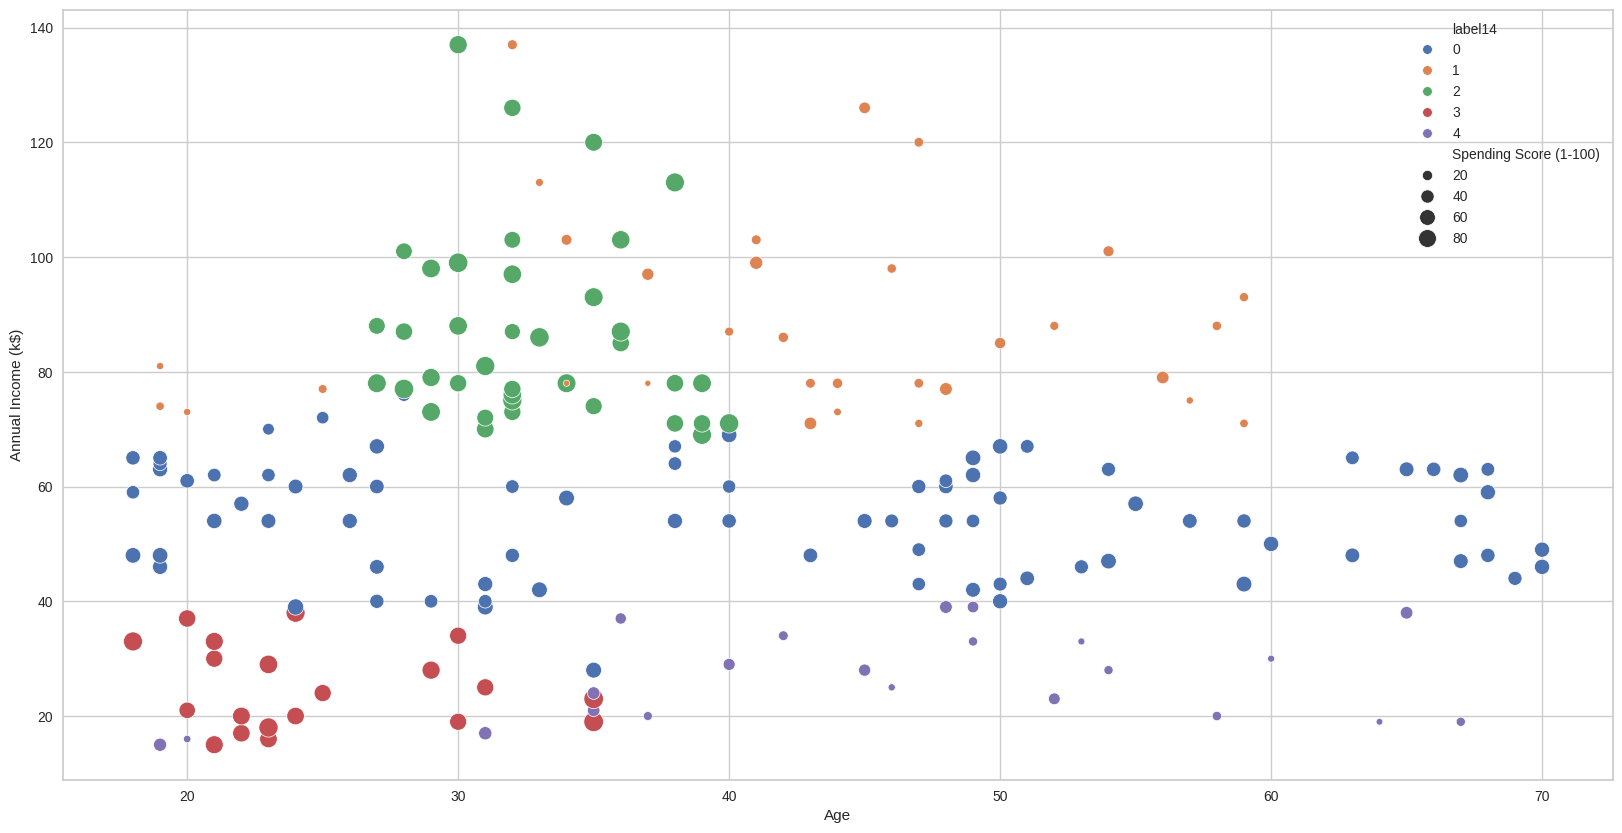

In [32]:
plt.figure(figsize=(20, 10))
sns.scatterplot(
    x="Age",
    y="Annual Income (k$)",
    hue="label14",
    size="Spending Score (1-100)",
    data=df,
    palette="deep",
    sizes=(20, 200),
);

KMean, clustering 


P411 P417